In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import umap

In [4]:
# Load embeddings
# embeddings are saved as an array of json objects
# each json object has a key 'embedding' which is a list of floats
# the list of floats is the embedding for the post
# read json file
embeddingsjson = pd.read_json("./embeddings/embeddings.json")

In [5]:
postsjson = pd.read_json("./posts/posts.json")

In [6]:
embeddingsjson.head()

,object,data,model,usage,id
0,list,"[{'object': 'embedding', 'index': 0, 'embeddin...",text-embedding-ada-002-v2,"{'prompt_tokens': 83, 'total_tokens': 83}",hs9mnz
1,list,"[{'object': 'embedding', 'index': 0, 'embeddin...",text-embedding-ada-002-v2,"{'prompt_tokens': 95, 'total_tokens': 95}",i9ljw9
2,list,"[{'object': 'embedding', 'index': 0, 'embeddin...",text-embedding-ada-002-v2,"{'prompt_tokens': 90, 'total_tokens': 90}",fxucds
3,list,"[{'object': 'embedding', 'index': 0, 'embeddin...",text-embedding-ada-002-v2,"{'prompt_tokens': 92, 'total_tokens': 92}",b5f9wi
4,list,"[{'object': 'embedding', 'index': 0, 'embeddin...",text-embedding-ada-002-v2,"{'prompt_tokens': 80, 'total_tokens': 80}",hni7zy


In [50]:
# embeddingsjson["data"].values[0][0]['embedding']

In [7]:
# convert json to a numpy array that can be fed to umap
embeddings = np.array([np.array(x[0]['embedding']) for x in embeddingsjson['data'].values])

In [8]:
embeddings.shape

(995, 1536)

In [23]:
# reduce dimensionality with umap
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.05,
    metric='cosine',
    random_state=42,
    n_components=2,
    verbose=True
)

In [24]:
embedding = reducer.fit_transform(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.05, n_neighbors=25, random_state=42, verbose=True)
Fri Apr 14 23:12:07 2023 Construct fuzzy simplicial set
Fri Apr 14 23:12:08 2023 Finding Nearest Neighbors
Fri Apr 14 23:12:08 2023 Finished Nearest Neighbor Search
Fri Apr 14 23:12:08 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri Apr 14 23:12:10 2023 Finished embedding


In [11]:
embedding.shape

(995, 2)

/var/folders/sx/rrvr6l_d5x1_g46jxlx5ypfc0000gn/T/ipykernel_78086/957914067.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')


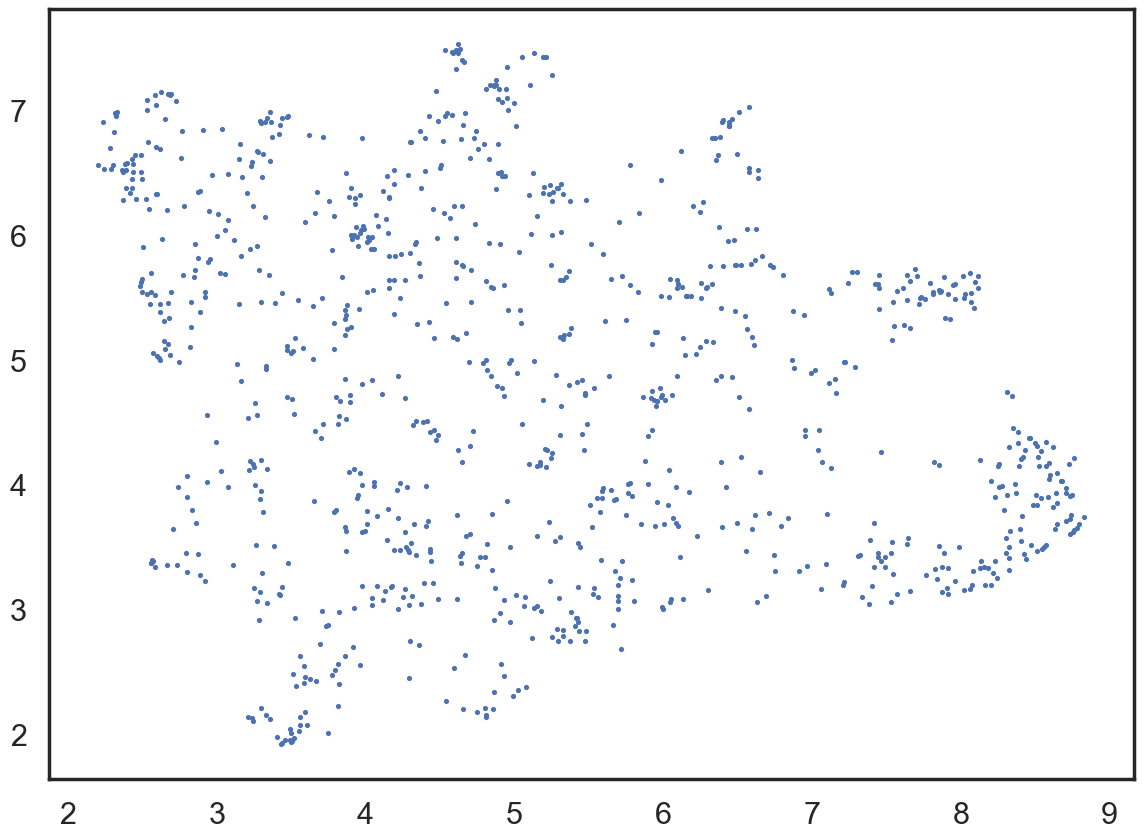

In [19]:
# plot embedding
plt.scatter(embedding[:, 0], embedding[:, 1], s=3, cmap='Spectral')
plt.show()

In [13]:
#write embedding to csv file with header x,y
np.savetxt("./posts/reddit-umap25.05.csv", embedding, delimiter=",", header="x,y", comments='')

In [45]:
# Create an HDBSCAN instance with custom parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)



In [46]:
# Fit the model to your dataset
clusterer.fit(embedding)

HDBSCAN(min_samples=5)

In [47]:
clusterer.labels_

array([41, 16, 13, 48, 10,  1, -1, -1, -1, 13, -1, 17, -1,  0,  6, 13,  1,
       43, 40, 24, 35, 42,  5, 34, 32, -1,  1,  1,  0, 16,  1,  9, 41, 13,
       41, -1, 47, -1, 29,  1, 34, -1, 15,  1, -1, 19, 20,  1, 22, 37, 23,
       40, -1, -1,  1, 13, -1, 18, 13, 13,  1, 10, 13, 10, -1, 13, 13, 35,
        0, 33, -1, -1, 34, -1, 20, -1, -1, 16, -1, 16, 13,  1, 22, -1, 19,
       25, 13, -1,  1,  9, 13, 32, -1, 36, 23, 17, 38, 20, 13, 14, -1, 13,
       30, -1, 22, -1, 16, -1, -1,  2, 35, 12,  3, -1, 13, 13, 13, -1, 36,
       13,  5, 12,  1, -1, 39, 27, 22, 10, 21, 13, 33, 10, 18, -1, 42,  8,
        1,  0, 35, 36, -1, 29, 16, 32, 10, -1, 12, 14, -1, -1, 26, -1, 10,
       46, -1, 36, 15, 40, 10, 48, 42, 21, 34, 23, -1, -1, 15, 42, 13, -1,
        1, 23, -1, 23, 44, -1,  8, 13, 13, 15, -1, 14,  6, 34,  3, 31, -1,
       -1, -1, 20, 13, 21, 17, 13,  4, 13,  7, 42,  6, 20, -1, 27, 21, 36,
       16, -1, 35, -1, 36, -1, -1, -1,  5, 42, 29, 46, 34, 43, 31, -1, 13,
       45, 14,  0, -1, 48

In [48]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [49]:
# write clusterer.labels_ to a csv file
np.savetxt("./posts/reddit-hdbscan5.csv", clusterer.labels_, delimiter=",", header="cluster", comments="")